In [1]:
import os
import gc
import pickle
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

# self-defined functions
# from helper import *
# from tabu_helper import *
from tabu import tabu_search

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
rootPath = os.getcwd() + '/..'

In [3]:
with open(rootPath + '/clean_data/sectorMap.pkl', 'rb') as f:
    sectorMap = pickle.load(f)
    
with open(rootPath + '/clean_data/inv_sectorMap.pkl', 'rb') as f:
    inv_sectorMap = pickle.load(f)

with open(rootPath + '/clean_data/ratingMap.pkl', 'rb') as f:
    ratingMap = pickle.load(f)
    
train = pd.read_csv(rootPath + '/clean_data/train.csv', index_col=0)
test = pd.read_csv(rootPath + '/clean_data/test.csv', index_col=0)
corr = pd.read_csv(rootPath + '/clean_data/corr.csv', index_col=0)
varDF = pd.read_csv(rootPath + '/clean_data/var.csv', index_col=0)

train.index = pd.DatetimeIndex(train.index)
test.index = pd.DatetimeIndex(test.index)

In [4]:
alpha = 0.05
check_params = {
    "sectorMap": sectorMap,
    "inv_sectorMap": inv_sectorMap,
    "corr_df": corr,
    "risk_series": varDF[str(alpha)],
    "snum_ub": 30,
    "snum_lb": 10,
    "sector_snum_ub": 6,
    "corr_ub": 0.5,
    "risk_all_ub": 0,
    "risk_ind_ub": 0,
    "risk_all_lb": -0.03,
    "risk_ind_lb": -0.05,
    "details": False
}

In [5]:
train.head(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2016-01-04,64.31,128.21,48.40,58.79,159.0,54.24,44.25,18.31,60.01,61.68,...,63.47,76.06,38.05,75.36,142.07,51.68,35.92,39.39,86.28,64.88
2016-01-05,63.96,128.47,47.68,59.17,159.0,54.73,43.50,18.47,60.39,61.14,...,63.44,76.25,37.79,75.21,143.14,51.40,36.06,40.50,87.82,64.57


In [6]:
train.tail(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2019-12-30,88.63,235.81,66.53,52.71,241.40,119.28,26.12,61.35,184.63,131.60,...,95.70,189.31,59.35,148.48,316.52,60.36,78.89,37.52,94.03,124.50
2019-12-31,89.33,234.67,65.58,52.75,240.28,118.82,25.23,60.68,183.05,130.79,...,95.31,187.06,58.72,147.87,313.12,59.50,78.87,37.38,93.54,124.06


In [7]:
test.head(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2020-01-02,90.13,235.25,67.51,53.04,243.0000,120.11,25.70,62.00,184.21,131.53,...,96.85,189.00,59.91,149.28,319.32,60.88,79.16,39.39,95.28,124.79
2020-01-03,88.55,228.65,68.87,52.82,237.1635,118.00,25.71,60.69,184.49,127.63,...,94.96,188.41,58.03,150.00,317.51,61.06,79.03,37.50,92.88,123.83


In [8]:
test.tail(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2020-04-16,79.88,214.44,34.86,35.71,225.00,101.52,7.96,51.870,171.46,107.66,...,65.88,167.11,66.454,148.31,261.76,24.01,66.76,13.55,52.46,94.37
2020-04-17,80.59,217.46,32.99,36.23,236.83,103.96,7.45,53.635,176.08,107.24,...,65.23,169.65,66.500,153.48,263.22,22.61,68.73,13.09,50.26,96.37


### Try One time

In [9]:
training_params = {
    'return_df': train, 
    'test_return_df': test,
    'params': check_params, 
    'tabu_list_size': 20, 
    'iterations_times': 1000, 
    'early_stop': 50, 
    'neighbor_size': 50, 
    'asp_improve_level': 1, 
    'seed': None,
}

In [10]:
tryOne = tabu_search(**training_params)

 19%|█▉        | 190/1000 [01:58<12:56,  1.04it/s]


1.065486301232989
-0.14325893061281442


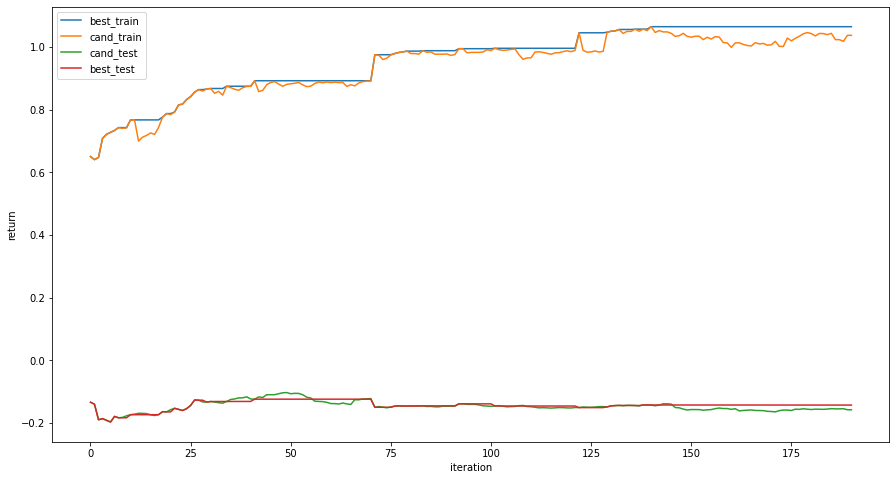

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(list(range(tryOne['iterations'])), tryOne['best_perfList'], label='best_train')
plt.plot(list(range(tryOne['iterations'])), tryOne['cand_perfList'], label='cand_train')
plt.plot(list(range(tryOne['iterations'])), tryOne['cand_test_perfList'], label='cand_test')
plt.plot(list(range(tryOne['iterations'])), tryOne['best_test_perfList'], label='best_test')
plt.xlabel('iteration')
plt.ylabel('return')
plt.legend()
print(tryOne['best_perfList'][-1])
print(tryOne['best_test_perfList'][-1])

In [12]:
tryOne['used_time']

118.78234314918518

In [19]:
pd.set_option('display.max_columns', None)
tryOne['best_series'].to_frame(name='stock').T

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,BLL,BK,VZ,BBY,HRB,CAH,CTL,CMA,C,CMS,DHR,DOV,OMC,PKI,ECL,EFX,FITB,RF,USB,BEN,GPS,HAS,HD,CNP,HBAN,ITW,IPG,JCI,KLAC,LMT,L,LOW,MRO,MMC,MCK,MDT,MU,NWL,NKE,JWN,NTRS,NOC,NUE,PNC,PH,PAYX,PPL,PHM,SEE,KEY,LUV,T,STT,SYY,TMO,AEE,UNH,VMC,TJX,TFC,MS,MSFT,ORCL,ADBE,UNM,PGR,CCL,VIAC,SCHW,WM,FCX,CINF,CSCO,AZO,AES,QCOM,LIN,BSX,KSS,AGN,HUM,ALL,MAR,COST,EMN,COF,DRI,NTAP,HIG,YUM,RHI,STZ,CTAS,CMCSA,FLS,EXPD,MTB,J,LEG,LEN,HST,MKC,MYL,NBL,NI,SJM,PSA,SYK,TSN,UPS,VAR,VNO,WEC,ZION,TROW,HOG,FISV,TIF,XRAY,FAST,APH,PXD,DVN,LH,VLO,NLOK,PBCT,EOG,EA,COG,XLNX,BIIB,KIM,GILD,DHI,SBUX,INTU,MCHP,EQR,SPG,IVZ,AVB,PLD,AIV,ABC,DVA,EL,WAT,CTXS,TRV,ETFC,NOV,DGX,AMZN,RL,BXP,CHRW,VRSN,AMT,CTSH,EBAY,GS,NVDA,JNPR,AKAM,EXPE,A,MET,ISRG,MCO,TPR,MDLZ,PRU,ZBH,ANTM,PFG,CME,NDAQ,AIZ,CRM,MA,GOOGL,ICE,CF,AMP,FIS,WU,DFS,PM,CBRE,ABT,HON,AEP,BA,BMY,CPB,CAT,CVX,KO,CL,ED,GLW,DE,DTE,D,ETN,XOM,F,GD,GE,HAL,HSY,IBM,IP,K,KMB,KR,SPGI,CVS,MRK,ETR,MMM,MSI,NSC,XEL,FE,PPG,SRE,PEP,PFE,EXC,MO,COP,PG,PEG,AXP,AIG,AAPL,ADM,ADP,BAX,BDX,BF.B,CI,CSX,JPM,CLX,CAG,TAP,CMI,TGT,DIS,DUK,EMR,NEE,FDX,GIS,GPC,GWW,HPQ,INTC,IFF,JNJ,LLY,LB,LNC,MAS,MCD,BAC,NEM,WFC,OXY,PCAR,ROK,SLB,SHW,SNA,EIX,SO,SWK,TXN,TXT,UNP,VFC,WMT,WBA,WY,WHR,WMB,XRX,AMD,ALK,AON,DXC,COO,DD,ATO,AJG,LHX,HLT,HFC,TT,EVRG,RJF,ROL,AOS,TFX,GL,UDR,RTX,LNT,JKHY,COTY,IT,NVR,PEAK,CDNS,DRE,ABMD,MXIM,FRC,MGM,WRB,IEX,SIVB,TMUS,IQV,TWTR,PAYC,KEYS,ANET,HOLX,CFG,IDXX,ZBRA,ODFL,SNPS,STE,CDW,REG,INCY,MAA,ALB,CPRT,RMD,DISH,WAB,RE,ANSS,TTWO,ARE,MTD,NCLH,SBAC,CHTR,PKG,ALGN,GPN,CNC,TDG,LKQ,MKTX,DLR,LVS,CE,INFO,UAA,LDOS,LYV,FANG,NOW,IPGP,BR,CXO,MSCI,ULTA,AWK,FTNT,CBOE,FLT,HII,FBHS,AAL,SWKS,AME,BRK.B,CHD,DAL,DG,FMC,FRT,GM,WELL,KHC,HP,HRL,JBHT,KMI,KSU,LRCX,ES,OKE,PNR,PVH,ROST,UAL,UHS,WDC,CERN,ZTS,ABBV,NWSA,SYF,HCA,REGN,MNST,VRTX,PYPL,PRGO,ROP,MHK,HPE,CB,ORLY,RCL,FLIR,BWA,MLM,TSCO,WRK,ESS,O,DLTR,HSIC,ALXN,IRM,KMX,QRVO,SLG,URI,PWR,NLSN,VTR,RSG,CCI,APTV,BKNG,FFIV,BLK,EW,NRG,ILMN,EQIX,GRMN,ACN,ADS,WLTW,AAP,NFLX,WYNN,STX,EXR,MOS,DISCA,CMG,FB,PSX,HBI,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
stock,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
tryOne['best_series'].iloc[tryOne['best_series'].nonzero()].index.values

array(['UNH', 'AZO', 'HUM', 'FISV', 'NVDA', 'MA', 'GOOGL', 'D', 'IP',
       'SHW', 'EIX', 'AON', 'TFX', 'NVR', 'MTD', 'CHTR', 'ALGN', 'TDG',
       'LKQ', 'MKTX', 'KMI', 'LRCX', 'UHS', 'ORLY', 'MLM', 'VTR', 'BKNG',
       'EQIX', 'NFLX', 'CMG'], dtype=object)

In [30]:
tryOne.keys()

dict_keys(['best_perfList', 'cand_perfList', 'cand_test_perfList', 'best_test_perfList', 'best_series', 'best_perf', 'iterations', 'early_stop', 'used_time'])

In [31]:
tryOne['best_perf'], tryOne['best_test_perfList'][-1]

(1.065486301232989, -0.14325893061281442)